In [7]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.initializers import GlorotUniform, GlorotNormal, HeNormal, HeUniform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Keras/Diabetes Binary Classification.csv')

In [3]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop(columns='Class variable (0 or 1)')
y = df['Class variable (0 or 1)']
X = X.values
y = y.values

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Xavier Normal/Uniform

In [25]:
model = Sequential()

model.add(Dense(16, input_shape=(8,), kernel_initializer=GlorotNormal(seed=5), activation='tanh'))
model.add(Dense(64, activation='tanh', kernel_initializer=GlorotUniform(seed=5)))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history = model.fit(X_train_scaled, Y_train, epochs=50, validation_data=(X_test_scaled, Y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5348 - loss: 0.6973 - val_accuracy: 0.7143 - val_loss: 0.5708
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6980 - loss: 0.5786 - val_accuracy: 0.7532 - val_loss: 0.5062
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7030 - loss: 0.5461 - val_accuracy: 0.7857 - val_loss: 0.4711
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7626 - loss: 0.5049 - val_accuracy: 0.8117 - val_loss: 0.4499
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7920 - loss: 0.4654 - val_accuracy: 0.8182 - val_loss: 0.4358
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7897 - loss: 0.4636 - val_accuracy: 0.8117 - val_loss: 0.4282
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7741 - loss: 0.4661 - val_accuracy: 0.8052 - val_loss: 0.4204
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7742 - loss: 0.4668 - val_accuracy: 0.8117 - val_loss

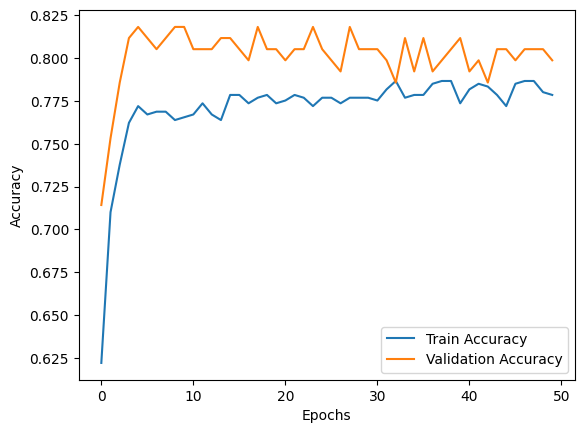

In [28]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# He Normal/Uniform

In [46]:
model1 = Sequential()

model1.add(Dense(16, input_shape=(8,), kernel_initializer=HeNormal(seed=5), activation='relu'))
model1.add(Dense(64, activation='relu', kernel_initializer=HeUniform(seed=5)))
model1.add(Dense(1, activation='sigmoid'))

In [47]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
history1 = model1.fit(X_train_scaled, Y_train, epochs=50, validation_data=(X_test_scaled, Y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.4388 - loss: 0.8221 - val_accuracy: 0.6883 - val_loss: 0.6068
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6837 - loss: 0.6211 - val_accuracy: 0.7403 - val_loss: 0.5411
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7053 - loss: 0.5728 - val_accuracy: 0.7532 - val_loss: 0.5122
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7512 - loss: 0.5384 - val_accuracy: 0.7792 - val_loss: 0.4962
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7575 - loss: 0.5205 - val_accuracy: 0.7987 - val_loss: 0.4884
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7603 - loss: 0.5178 - val_accuracy: 0.7857 - val_loss: 0.4853
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7745 - loss: 0.5046 - val_accuracy: 0.7857 - val_loss: 0.4812
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7846 - loss: 0.4888 - val_accuracy: 0.7857 - val

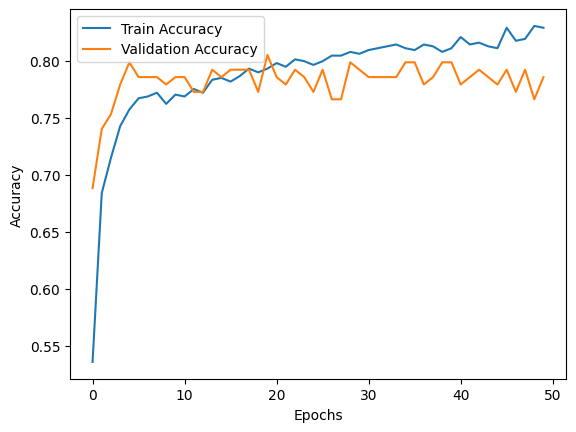

In [49]:
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()